<h1>Data Preprocessing</h1>

<h2>Data cleaning</h2>

<h3>Assess Data Quality</h3>

In [1]:
import pandas as pd
df=pd.read_csv('bakery.csv',parse_dates=True)
df

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


<h4>Standarize Date format</h4>

In [3]:
df = df.copy()
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionNo  20507 non-null  int64         
 1   Items          20507 non-null  object        
 2   DateTime       20507 non-null  datetime64[ns]
 3   Daypart        20507 non-null  object        
 4   DayType        20507 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 801.2+ KB


<h4>Check Duplicates</h4>

In [5]:
df.duplicated().sum()

1620

In [6]:
df=df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

<h4>Overall Info</h4>

In [8]:
df['Daypart'].unique()

array(['Morning', 'Afternoon', 'Evening', 'Night'], dtype=object)

In [9]:
df['DayType'].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [10]:
df['Items'].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

<h2>Data transformation</h2>

<h3>Feature Extraction</h3>

In [11]:
df['Day']=df['DateTime'].dt.day

In [12]:
df['Month']=df['DateTime'].dt.month

In [13]:
df['Year']=df['DateTime'].dt.year

In [14]:
df['dayofweek'] = df['DateTime'].dt.dayofweek


In [15]:
days={6:"sunday",0:"monday",1:"tuesday",2:"wednesday",3:"thursday",4:"friday",5:"sunday"}

In [16]:
df['dayofweek']=df['dayofweek'].map(days)

In [17]:
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType,Day,Month,Year,dayofweek
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,30,10,2016,sunday
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,30,10,2016,sunday
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,30,10,2016,sunday
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,30,10,2016,sunday
5,3,Cookies,2016-10-30 10:07:57,Morning,Weekend,30,10,2016,sunday


In [18]:
df['Year'].unique()

array([2016, 2017])

In [19]:
df['Month'].unique()

array([10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12])

<h3>Encoding</h3>

<p>Market Basket Data Preprocessing & Transaction Encoding
1. Why we use TransactionEncoder

In Market Basket Analysis, each row in the dataset may contain multiple items bought in a single transaction.

Standard One-Hot Encoding (like pd.get_dummies) works well for categorical columns where each row has only one value, but fails for multi-item transactions.

TransactionEncoder is specifically designed to handle lists of items per transaction, creating a binary matrix indicating the presence or absence of each item.

This format is required for association rule mining algorithms like Apriori or FP-Growth.</p>

In [20]:
import pandas as pd



df_encoded = df[["TransactionNo", "Items"]]
df_encoded = df.drop_duplicates()

transactions = df_encoded.groupby("TransactionNo")["Items"].apply(list).tolist()
#عشان اخلي الداتا بال  itemsets (order)  مش بال  items 

In [21]:
transactions

[['Bread'],
 ['Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna'],
 ['Bread', 'Medialuna'],
 ['Jam', 'Coffee', 'Tartine', 'Pastry', 'Tea'],
 ['Basket', 'Bread', 'Coffee'],
 ['Bread', 'Medialuna', 'Pastry'],
 ['Mineral water', 'Scandinavian'],
 ['Bread', 'Medialuna', 'Coffee'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Farm House', 'Bread'],
 ['Bread', 'Medialuna'],
 ['Coffee', 'Medialuna', 'Bread'],
 ['Jam'],
 ['Scandinavian', 'Muffin'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Coffee', 'Bread'],
 ['Bread', 'Jam'],
 ['Bread'],
 ['Basket'],
 ['Scandinavian', 'Muffin'],
 ['Coffee'],
 ['Coffee', 'Muffin'],
 ['Muffin', 'Scandinavian'],
 ['Tea', 'Bread'],
 ['Coffee', 'Bread'],
 ['Bread', 'Tea'],
 ['Scandinavian'],
 ['Juice', 'Tartine', 'Coffee', 'Muffin'],
 ['Scandinavia

In [22]:
!pip install mlxtend

In [23]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_data = te.fit(transactions).transform(transactions)
trns_encoded = pd.DataFrame(te_data, columns=te.columns_)


In [24]:
trns_encoded

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<h1>EDA</h1>

In [25]:
Transactions_per_Daypart=df.groupby('Daypart')['TransactionNo'].count()

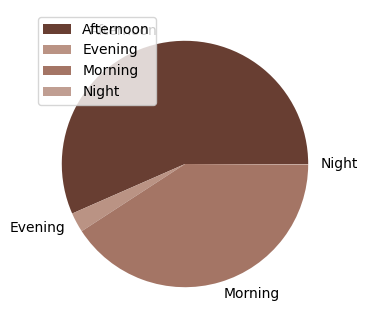

In [43]:
import matplotlib.pyplot as plt
colors=['#683e32','#ba9384','#a47565','#c09e92']
#colors=['#683e32','#7d4d3f','#a47565','#ba9384','#c09e92']
plt.figure(figsize=(4, 4))
plt.pie( Transactions_per_Daypart.values,labels=Transactions_per_Daypart.index,colors=colors)
plt.legend(loc='upper left')
plt.show()


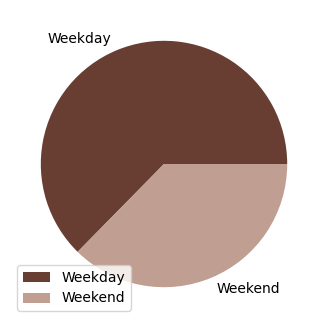

In [70]:
import matplotlib.pyplot as plt
DayType_counts=df['DayType'].value_counts()
colors=['#683e32','#c09e92']

plt.figure(figsize=(4, 4))
plt.pie( DayType_counts.values,labels=DayType_counts.index,colors=colors)
plt.legend(loc='lower left')
plt.show()


In [28]:
df.columns

Index(['TransactionNo', 'Items', 'DateTime', 'Daypart', 'DayType', 'Day',
       'Month', 'Year', 'dayofweek'],
      dtype='object')

In [29]:
sales=df.groupby(['Year','Month'])['Month'].count()

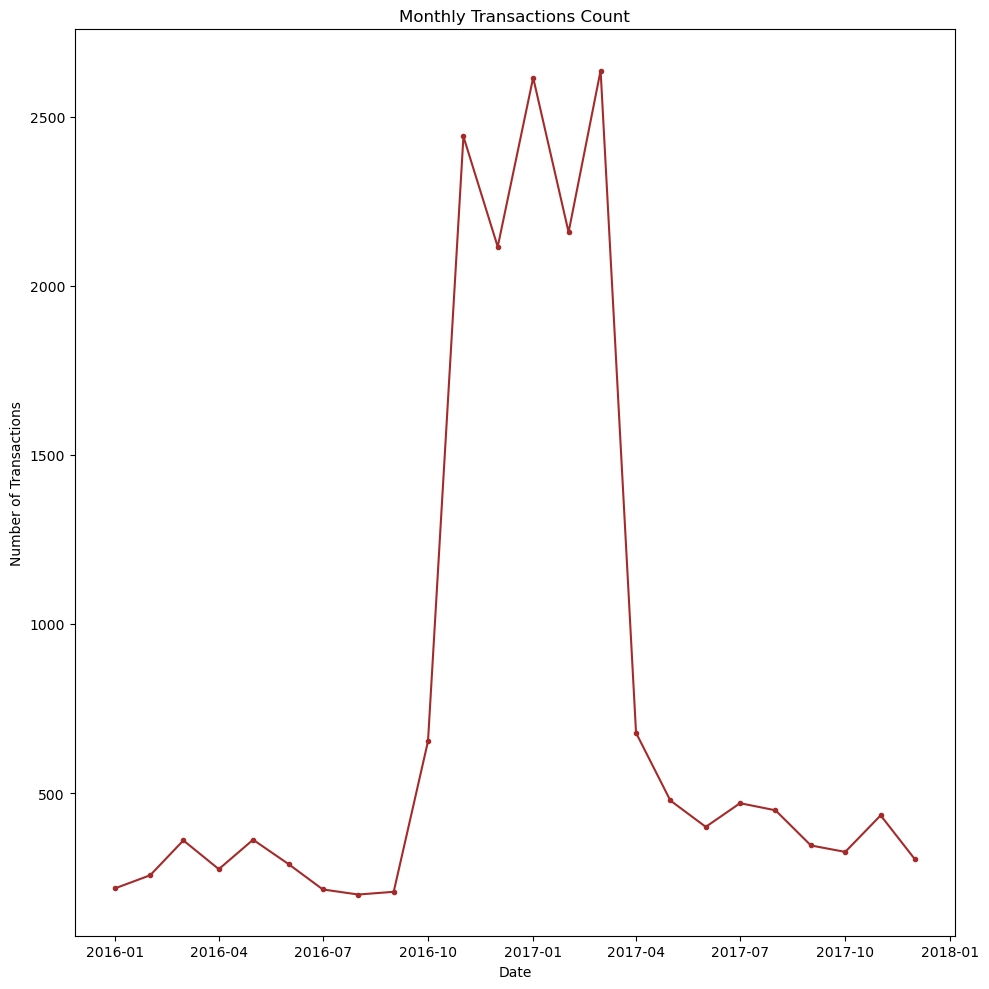

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

sales = df.groupby(['Year','Month']).size().reset_index(name='Count')

sales['Date'] = pd.to_datetime(sales[['Year', 'Month']].assign(DAY=1))
plt.figure(figsize=(10,10))
plt.plot(sales['Date'], sales['Count'],marker='.',color='brown')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Monthly Transactions Count')
plt.tight_layout()
plt.show()

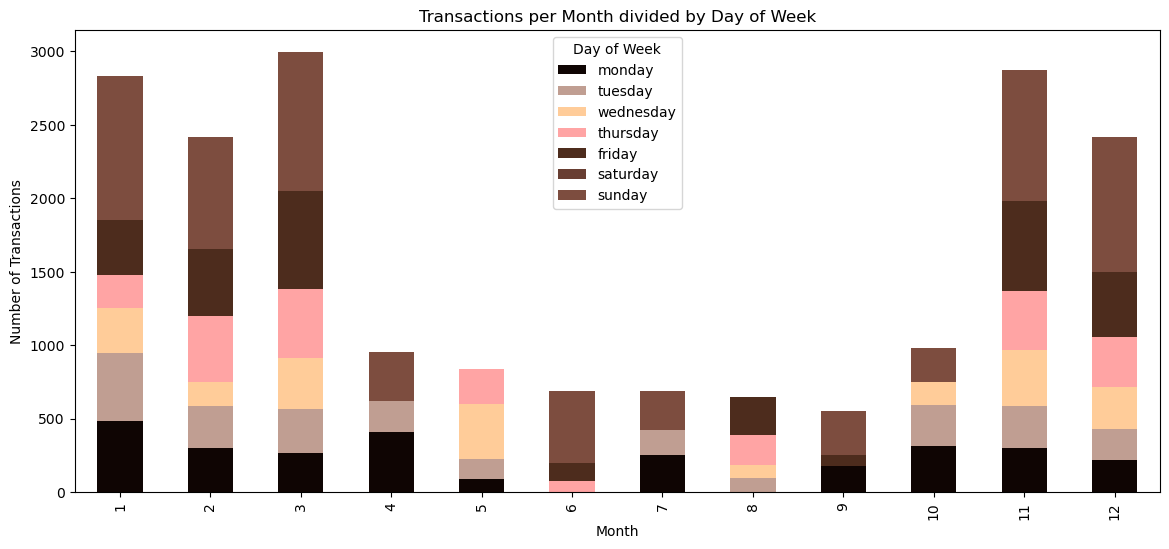

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame already defined

counts = df.groupby(['Month', 'dayofweek']).size().reset_index(name='Count')

pivot_df = counts.pivot(index='Month', columns='dayofweek', values='Count').fillna(0)

day_order = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']
pivot_df = pivot_df.reindex(columns=day_order, fill_value=0)

# Define your custom palette colors
custom_colors = ['#0f0503', '#c09e92', '#ffcc99', '#ffa4a4', '#4d2c1d', '#683e32', '#7d4d3f']

# Plot stacked bar chart with custom colors
pivot_df.plot(kind='bar', stacked=True, figsize=(14,6), color=custom_colors)

plt.title("Transactions per Month divided by Day of Week")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.legend(title="Day of Week")
plt.show()


In [32]:
df['Date'] = df['DateTime'].dt.date

In [33]:
daily_counts = df.groupby('Date').size().reset_index(name='Count')

In [34]:
!pip install dayplot

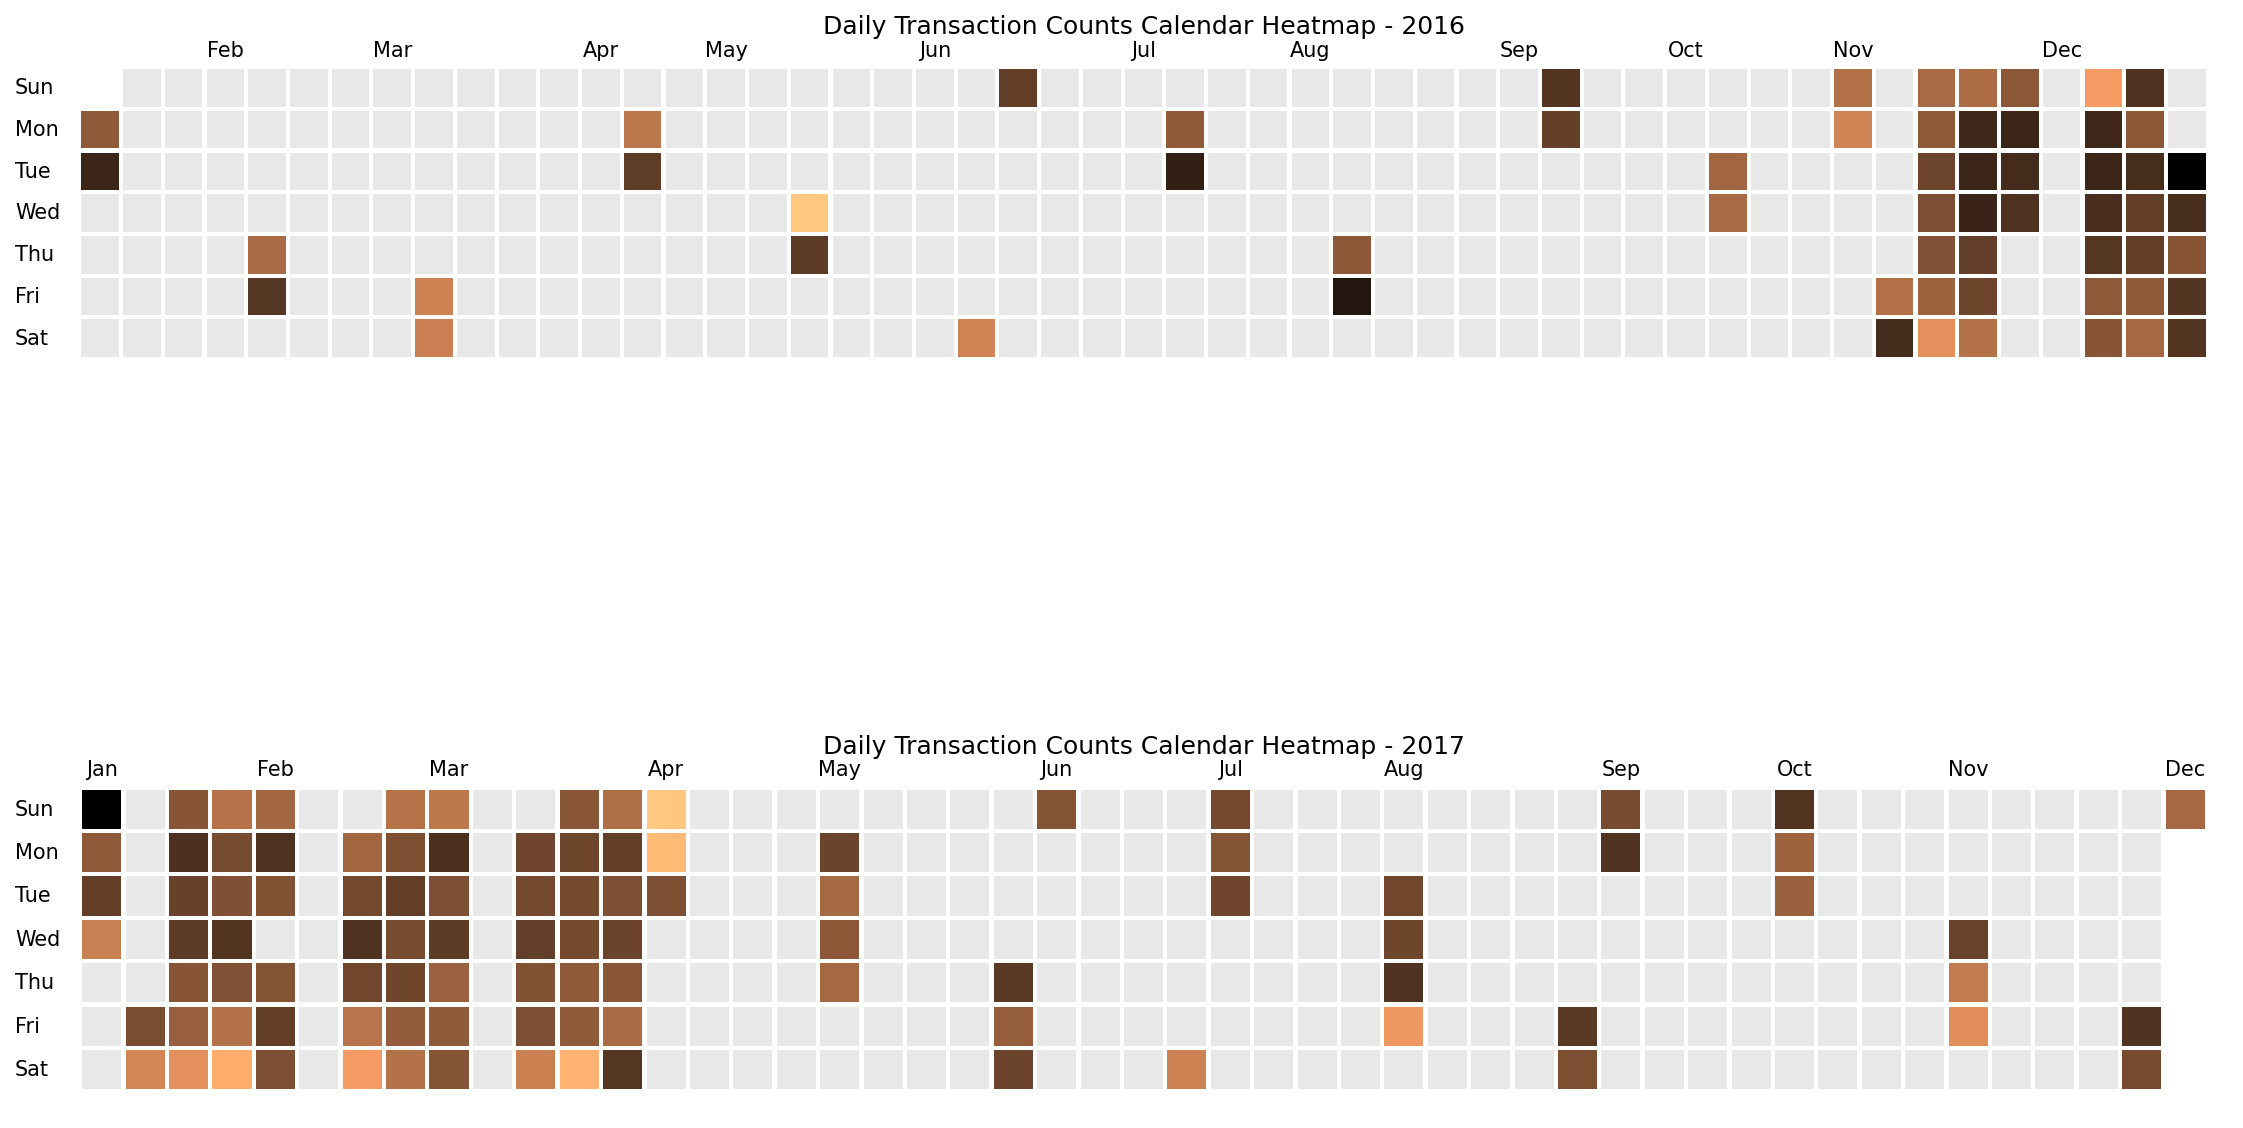

In [65]:
import matplotlib.pyplot as plt
import dayplot as dp
import pandas as pd

daily_counts['Date'] = pd.to_datetime(daily_counts['Date'])

daily_2016 = daily_counts[daily_counts['Date'].dt.year == 2016]
daily_2017 = daily_counts[daily_counts['Date'].dt.year == 2017]

fig, axs = plt.subplots(2, 1, figsize=(15, 12), dpi=150)

# خريطة 2016 بتدرجات البني (مثلاً "copper" أو "brown")
dp.calendar(
    dates=daily_2016['Date'],
    values=daily_2016['Count'],
    start_date=daily_2016['Date'].min(),
    end_date=daily_2016['Date'].max(),
    cmap="copper",
    ax=axs[0]
)
axs[0].set_title("Daily Transaction Counts Calendar Heatmap - 2016")

# خريطة 2017 بتدرجات البيج (مثلاً "YlOrBr" أو "Oranges" الفاتح)
dp.calendar(
    dates=daily_2017['Date'],
    values=daily_2017['Count'],
    start_date=daily_2017['Date'].min(),
    end_date=daily_2017['Date'].max(),
    cmap="copper",
    ax=axs[1]
)
axs[1].set_title("Daily Transaction Counts Calendar Heatmap - 2017")

plt.tight_layout()
plt.show()


In [36]:
common_items=df['Items'].value_counts().head(10)

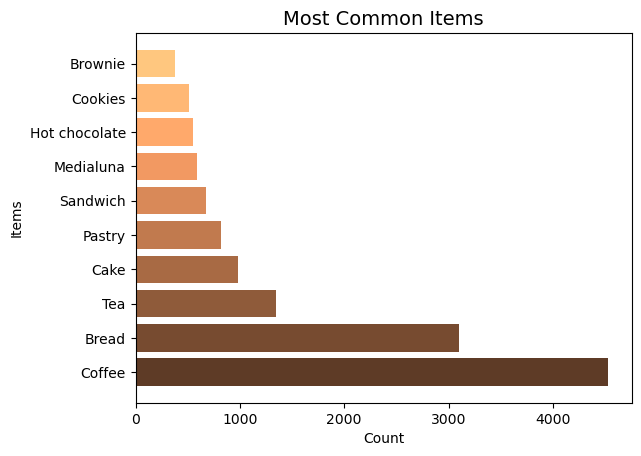

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# نحدد عدد العناصر
colors = plt.cm.copper(np.linspace(0.3, 1, len(common_items)))

plt.barh(common_items.index, common_items.values, color=colors)
plt.xlabel("Count")
plt.ylabel("Items")
plt.title("Most Common Items", fontsize=14)
plt.show()


<h1>ML model</h1>

In [88]:
# Association rule analysis
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(trns_encoded, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

#rules[['antecedents', 'consequents', 'antecedent support', 'consequent support', 'support', 'confidence']].head()
R=rules.sort_values(by="lift", ascending=False).head(10)
R

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
41,"(Tea, Coffee)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,1.0,0.004858,1.121962,0.509401,0.069853,0.108705,0.148957
15,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,1.0,0.005354,1.057910,0.523553,0.075683,0.054740,0.152760
16,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,1.0,0.005354,1.114125,0.498236,0.075683,0.102434,0.152760
17,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,1.0,0.008959,1.075372,0.439556,0.106736,0.070090,0.197779
18,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,1.0,0.008959,1.111865,0.420538,0.106736,0.100611,0.197779
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,1.0,0.007593,1.764582,0.332006,0.048464,0.433293,0.376936
40,(Pastry),"(Coffee, Bread)",0.086107,0.090016,0.011199,0.130061,1.444872,1.0,0.003448,1.046033,0.336907,0.067905,0.044007,0.127237
37,"(Coffee, Bread)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,1.0,0.003448,1.043749,0.338354,0.067905,0.041916,0.127237
33,(Sandwich),(Tea),0.071844,0.142631,0.014369,0.200000,1.402222,1.0,0.004122,1.071712,0.309050,0.071806,0.066913,0.150370
32,(Tea),(Sandwich),0.142631,0.071844,0.014369,0.100741,1.402222,1.0,0.004122,1.032134,0.334566,0.071806,0.031134,0.150370


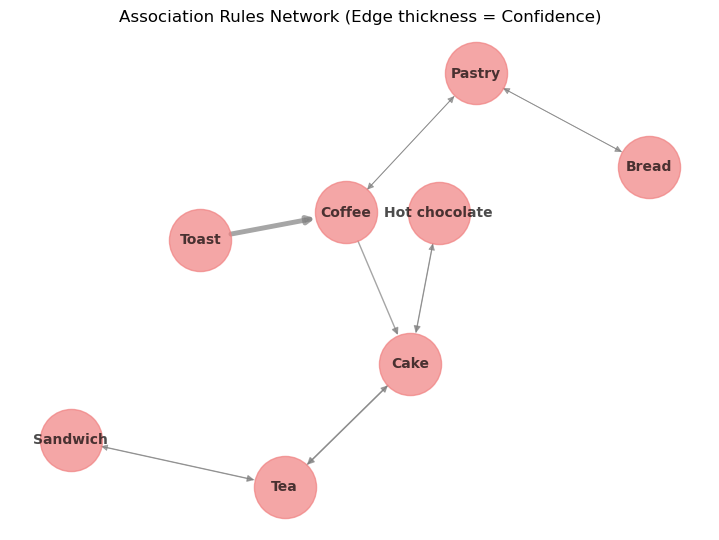

In [92]:
import matplotlib.pyplot as plt
import networkx as nx

# نعمل directed graph
G = nx.DiGraph()

# نضيف edges (العلاقات) مع الوزن = confidence
for _, row in R.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['confidence'])

# نجيب الأوزان عشان نستخدمها في السمك
edges = G.edges(data=True)
weights = [d['weight']*5 for (_,_,d) in edges]  # ×5 عشان يبان الفرق في السمك

# نرسم
plt.figure(figsize=(7,5))
pos = nx.spring_layout(G, k=0.5, iterations=50)

nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightcoral',
    node_size=2000,
    font_size=10,
    font_weight="bold",
    edge_color='gray',
    width=weights,   # هنا السمك مرتبط بالـ confidence
    alpha=0.7
)

plt.title("Association Rules Network (Edge thickness = Confidence)")
plt.show()
